## Lecture_3 : Global Vectors for word representation

### - Finish word2vec
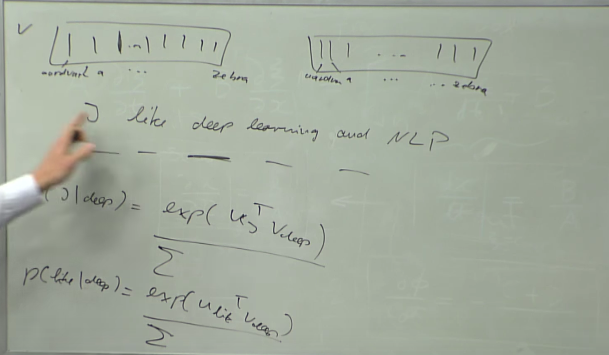

"I like deep learning and NLP"라는 문장의 word2vec은..  
deep이라는 단어가 주어졌을 때, 'I'가 나올 조건부 확률을 계산, 계산 방법은 단어벡터들이 모여있는 행렬에서 해당 단어의 벡터를 꺼내 내적한 후 exponential을 취함. 분모에는 문장의 모든 벡터의 합 
- 위와 같은 과정을 반복하며 window를 이동시켜 벡터를 구함

#### Q(from audience) n A(from ta)  
Q. How do we choose the dimensionality?  
A. we'll get to that once we look at the evaluation of these word vectors  
Q. how do we start and how much does it matter?  
A. most of the objective function in this lecture are not convex and you will learn how to 
trick on circumvent very bad local optima, but it turns out in practice, ** as long as you initialize with small random number, it does not tend to be a problem **

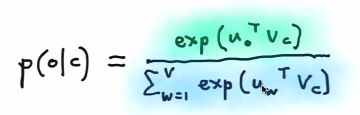
- 분자의 경우, 간단하고 빠르게 계산이 가능
- 분모의 경우, window를 옮기며 매번 계산을 할 경우, 계산량이 많아지고, 심지어 이 부분을 기계에게 학습시킬 수도 없음(영상에서 deep learning  이라는 단어의 경우, zebra나 aadrdvar의 단어들과는 전혀 co-occur하지 않음. 
- 대부분의 단어들은 대부분의 다른 단어들과 함께 등장하지 않음(don't actually appear with most other words) -> it's pretty sparse

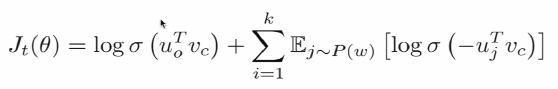
- skip gram model(시그마는 시그모이드 함수를 뜻함)
- first term : log식은 두 center words와 outside word의 co-occur에 대한 log probability를 나타냄
- second term : essentailly try to minimize their probability of co-occurring
- 목적 함수를 사용함으로써 실제로는 center words와 함께 등장하지 않는 zebra 같은 단어의 확률을 줄임
- $J_t(theta)$가 뜻하는 것은, 우리 모델에서 우리가 사용할 모든 변수들에 대한 파라미터, 여기서는 모든 u vector 과 모든 v vector  
- J is just our cost function and T is at the Tth time step at the window 
목적함수를 최적화 시키는 것이 목적이나, 한번에 모든 corpus를 update하는 것은 하지 않을 것 -> cuz that doesn't work usually work very well  

### - What does word2vec capture?

### - How could we capture this essence more effectively?

### - how can we analyse word vectors?